# 1 数据清洗

In [29]:
#导入模块
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#导入数据
app = pd.read_csv('applestore.csv')
app.head()

,Unnamed: 0,id,track_name,size_bytes,price,rating_count_tot,user_rating,prime_genre,sup_devices,ipadSc_urls,lang
0,0,281656475,PAC-MAN Premium,100788224,3.99,21292,4.0,Games,38,5,10
1,1,281796108,Evernote - stay organized,158578688,0.00,161065,4.0,Productivity,37,5,23
2,2,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,0.00,188583,3.5,Weather,37,5,3
3,3,282614216,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,0.00,262241,4.0,Shopping,37,5,9
4,4,282935706,Bible,92774400,0.00,985920,4.5,Reference,37,5,45


## 1.1 清洗异常值

In [2]:
#导入数据时，如果原数据没有索引，Python会默认生成索引，要把它删掉
#复制粘贴字段名不容易出错
#inplace = True之后，原数组名对应的内存值直接改变
app.drop('Unnamed: 0', axis = 1, inplace = True)
app.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7197 entries, 0 to 7196
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                7197 non-null   int64  
 1   track_name        7197 non-null   object 
 2   size_bytes        7197 non-null   int64  
 3   price             7197 non-null   float64
 4   rating_count_tot  7197 non-null   int64  
 5   user_rating       7197 non-null   float64
 6   prime_genre       7197 non-null   object 
 7   sup_devices       7197 non-null   int64  
 8   ipadSc_urls       7197 non-null   int64  
 9   lang              7197 non-null   int64  
dtypes: float64(2), int64(6), object(2)
memory usage: 562.4+ KB


## 1.2 清洗影响分析的值

In [4]:
#describe()只会对数值型数据进行计算
app.describe()

,id,size_bytes,price,rating_count_tot,user_rating,sup_devices,ipadSc_urls,lang
count,7.197000e+03,7.197000e+03,7197.000000,7.197000e+03,7197.000000,7197.000000,7197.000000,7197.000000
mean,8.631310e+08,1.991345e+08,1.726218,1.289291e+04,3.526956,37.361817,3.707100,5.434903
std,2.712368e+08,3.592069e+08,5.833006,7.573941e+04,1.517948,3.737715,1.986005,7.919593
min,2.816565e+08,5.898240e+05,0.000000,0.000000e+00,0.000000,9.000000,0.000000,0.000000
25%,6.000937e+08,4.692275e+07,0.000000,2.800000e+01,3.500000,37.000000,3.000000,1.000000
50%,9.781482e+08,9.715302e+07,0.000000,3.000000e+02,4.000000,37.000000,5.000000,1.000000
75%,1.082310e+09,1.819249e+08,1.990000,2.793000e+03,4.500000,38.000000,5.000000,8.000000
max,1.188376e+09,4.025970e+09,299.990000,2.974676e+06,5.000000,47.000000,5.000000,75.000000


In [128]:
#describe后发现size_bytes太大，转换为兆mb看来会更合适
app['size_mb'] = app['size_bytes'] / (1024*1024)

In [129]:
#如：最小的APP从0.56mb开始
app.size_mb.describe()

count    7197.000000
mean      189.909414
std       342.566408
min         0.562500
25%        44.749023
50%        92.652344
75%       173.497070
max      3839.463867
Name: size_mb, dtype: float64

## 1.3 核心变量的创建

In [62]:
#上上个describe后，想对免费和付费APP做分类分析，所以要创建标签
#定义price = x, paid = 0/1, 如果x > 0, paid = 1; else, paid = 0
#apply()应用规则，lambda匿名函数(里面没有逗号)，if(条件，满足返回，不满足返回)
app['paid'] = app['price'].apply(lambda x:1 if x > 0 else 0)
app.paid.describe()

count    7197.000000
mean        0.436432
std         0.495977
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: paid, dtype: float64

# 2 APP价格单变量分析

## 2.1 删除影响整体数据分布的异常值

In [16]:
#查看每个价格有多少个APP
app['price'].value_counts()

0.00      4056
0.99       728
2.99       683
1.99       621
4.99       394
3.99       277
6.99       166
9.99        81
5.99        52
7.99        33
14.99       21
19.99       13
8.99         9
24.99        8
13.99        6
11.99        6
29.99        6
12.99        5
15.99        4
59.99        3
17.99        3
22.99        2
23.99        2
20.99        2
27.99        2
16.99        2
49.99        2
39.99        2
74.99        1
18.99        1
34.99        1
99.99        1
299.99       1
47.99        1
21.99        1
249.99       1
Name: price, dtype: int64

In [4]:
#发现price > 49的极端值较少，但它们影响了整体数据分布，需要把这部分数据排除在分析范围以外
appL49 = app[app['price'] <= 49]
appL49['price'].value_counts()

0.00     4056
0.99      728
2.99      683
1.99      621
4.99      394
3.99      277
6.99      166
9.99       81
5.99       52
7.99       33
14.99      21
19.99      13
8.99        9
24.99       8
11.99       6
13.99       6
29.99       6
12.99       5
15.99       4
17.99       3
16.99       2
39.99       2
27.99       2
20.99       2
23.99       2
22.99       2
18.99       1
47.99       1
21.99       1
34.99       1
Name: price, dtype: int64

## 2.2 分析不同价格APP的分布情况

In [20]:
#数据的快速分组 即pd.cut(字段名, bins, labels, right)
#right = False表示数据左开右闭[)
bins = [0,2,10,300] #分组之间的节点
labels = ['<2','<10','300'] #方便分组的识别
appL49['price_interval'] = pd.cut(appL49.price, bins, labels = labels, right = False)
appL49['price_interval'].describe()

count     7188
unique       3
top         <2
freq      5405
Name: price_interval, dtype: object

## 2.3 分析不同类别APP的价格分布情况

In [13]:
#用groupby()将不同类别APP汇总 groupby(['条件'])['核心变量']
appL49.groupby(['prime_genre'])['price'].describe()

,count,mean,std,min,25%,50%,75%,max
prime_genre,,,,,,,,
Book,112.0,1.790536,3.342210,0.0,0.0,0.00,2.99,27.99
Business,55.0,3.302727,3.534023,0.0,0.0,2.99,4.99,14.99
Catalogs,10.0,0.799000,2.526660,0.0,0.0,0.00,0.00,7.99
Education,449.0,2.572004,2.669539,0.0,0.0,2.99,2.99,24.99
Entertainment,535.0,0.889701,1.454022,0.0,0.0,0.00,1.99,9.99
Finance,104.0,0.421154,1.108990,0.0,0.0,0.00,0.00,5.99
Food & Drink,63.0,1.552381,3.972119,0.0,0.0,0.00,1.49,27.99
Games,3862.0,1.432923,2.486609,0.0,0.0,0.00,1.99,29.99
Health & Fitness,180.0,1.916444,2.052378,0.0,0.0,1.99,2.99,9.99


## 2.4 分析用户评分

In [17]:
appL49['rating_count_tot'].describe()

count    7.188000e+03
mean     1.290867e+04
std      7.578550e+04
min      0.000000e+00
25%      2.700000e+01
50%      3.010000e+02
75%      2.798000e+03
max      2.974676e+06
Name: rating_count_tot, dtype: float64

In [27]:
#用户打分和价格的关系
bins = [0, 1000, 5000, 100000, 50000000]
appL49['rating_interval'] = pd.cut(app.rating_count_tot,bins, right = False)
appL49.groupby(['rating_interval'])['price'].describe()


,count,mean,std,min,25%,50%,75%,max
rating_interval,,,,,,,,
"[0, 1000)",4585.0,1.777675,3.169326,0.0,0.0,0.0,2.99,47.99
"[1000, 5000)",1193.0,1.740721,3.203853,0.0,0.0,0.0,2.99,39.99
"[5000, 100000)",1192.0,0.963549,1.984895,0.0,0.0,0.0,0.99,14.99
"[100000, 50000000)",218.0,0.196376,0.925160,0.0,0.0,0.0,0.00,7.99


# 3 业务数据可视化

## 3.1 折线图（关系图）

<Figure size 576x360 with 0 Axes>

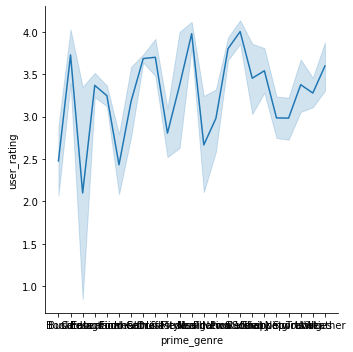

In [88]:
#分析49刀以下的APP种类和用户评分的关系
sns.relplot(x = 'prime_genre', y = 'user_rating', kind = 'line', data = appL49)

## 3.2 直方图（分布图）

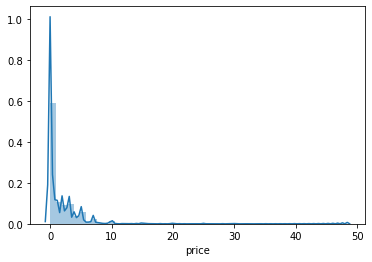

In [58]:
#分析49刀以下的APP价格的集中度，发现price < 10的情况居多，故需要分析price < 10的区间
sns.distplot(appL49['price'])


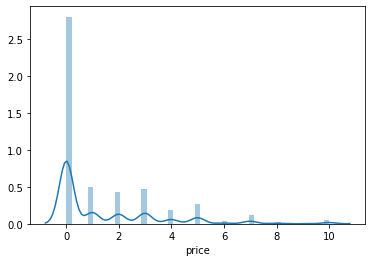

In [105]:
appL10 = app[app['price'] < 10]
sns.distplot(appL10['price'])

## 3.3 条形图（分类估计图）

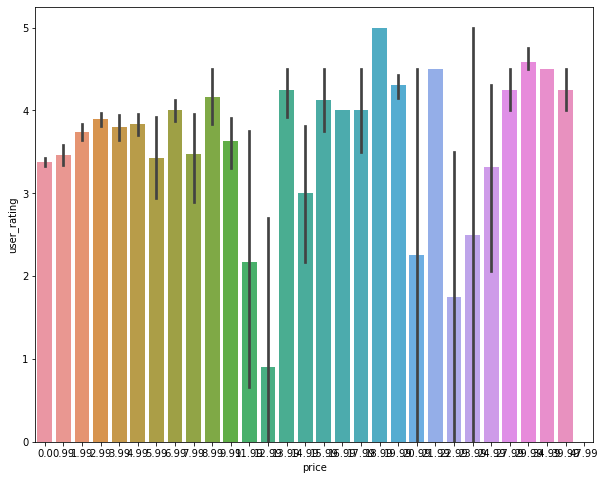

In [92]:
#分析价格和用户评分之间的关系
plt.figure(figsize = (10,8))
sns.barplot(x = 'price', y = 'user_rating', data = appL49)

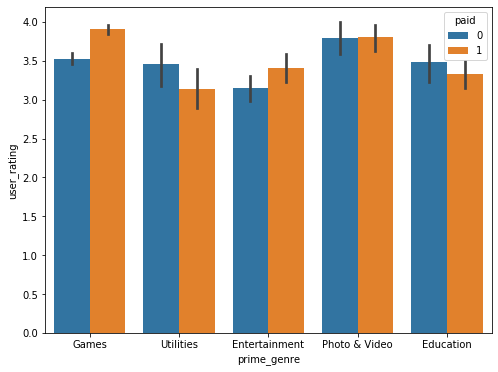

In [104]:
#发现数据太多，难以看出区别，故选出需要重点分析的种类进行可视化
top5 = ['Games', 'Entertainment', 'Education', 'Photo & Video', 'Utilities']
#把选出来的top5存入top5App，方便后续调用
top5App = app[app['prime_genre'].isin(top5)]

plt.figure(figsize = (8,6))
#用hue区分收费或者付费APP
sns.barplot(x = 'prime_genre', y = 'user_rating', data = top5App, hue = 'paid')

## 3.4 箱线图（分类分布图）

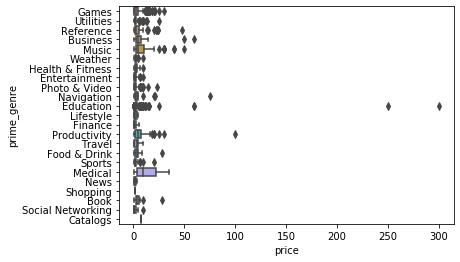

In [64]:
#分析49刀以下APP种类和付费的关系
sns.boxplot(x = 'price', y = 'prime_genre', data = app[app['paid'] == 1])

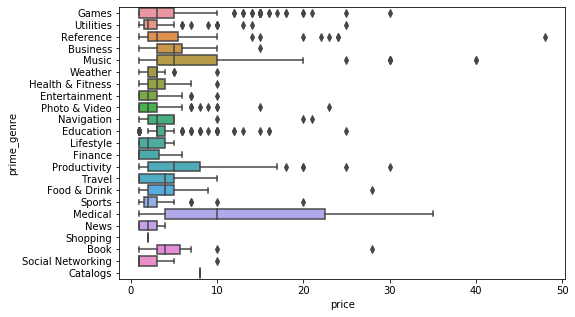

In [76]:
#数据普遍集中在49刀，超过50的的异常值较少且影响分布，故分析< 49刀的APP种类
plt.figure(figsize = (8,5))
appL49 = app[app['price'] < 49]
sns.boxplot(x = 'price', y = 'prime_genre', data = appL49[appL49['paid'] == 1])

## 3.5 散点图（关系图）

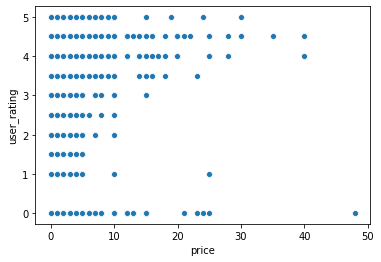

In [89]:
sns.scatterplot(x = 'price', y = 'user_rating', data = appL49)

# 4 数据分析的业务解读

## 4.1 免费或收费APP集中在哪些类别

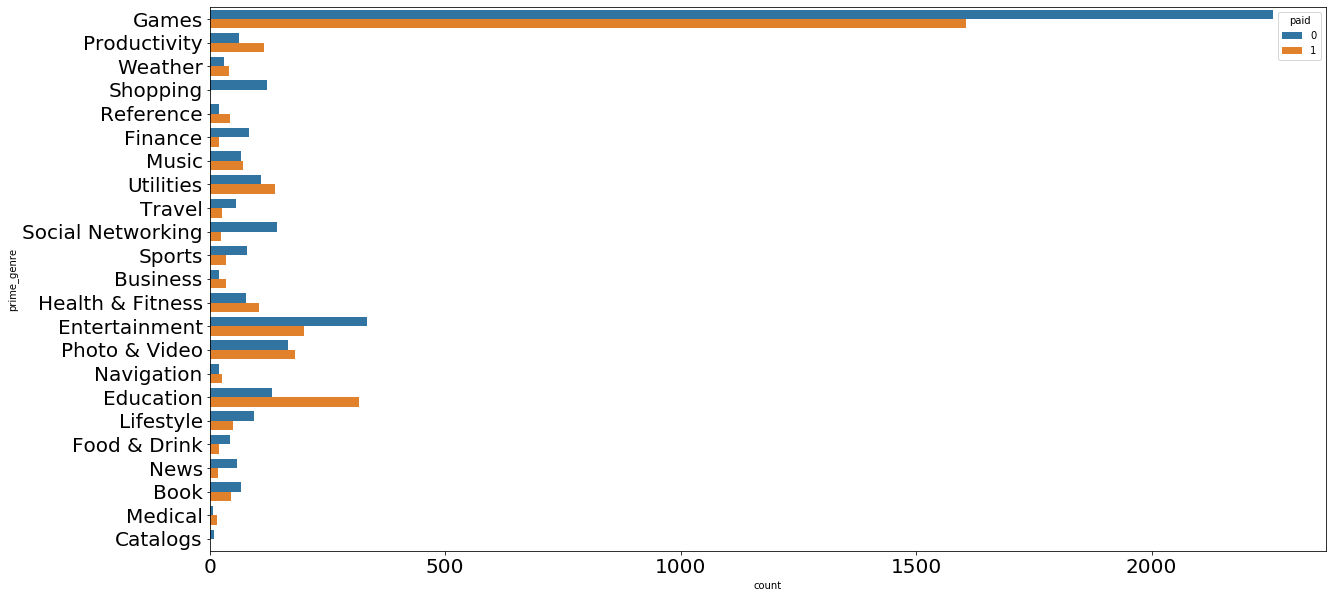

In [118]:
#按种类汇总APP数量
#countplot对数据进行汇总并可视化
plt.figure(figsize = (20,10))
plt.tick_params(labelsize = 20)
sns.countplot(y = 'prime_genre', hue = 'paid', data = appL49)

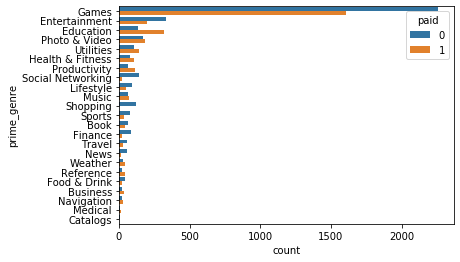

In [116]:
#评分由高到低排序
#order('核心变量'.汇总.index)
sns.countplot(y = 'prime_genre', hue = 'paid', data = appL49, order = appL49['prime_genre'].value_counts().index)

## 4.2 收费和免费的APP在不同评分区间的分布

In [122]:
bins = [0, 0.1, 2.5, 4.5, 5]
appL49['rating_interval'] = pd.cut(appL49['user_rating'], bins, right = False)
appL49.groupby(['rating_interval'])['user_rating'].describe()

,count,mean,std,min,25%,50%,75%,max
rating_interval,,,,,,,,
"[0.0, 0.1)",929.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
"[0.1, 2.5)",206.0,1.650485,0.400213,1.0,1.5,2.0,2.0,2.0
"[2.5, 4.5)",2902.0,3.645934,0.468022,2.5,3.5,4.0,4.0,4.0
"[4.5, 5.0)",2659.0,4.500000,0.000000,4.5,4.5,4.5,4.5,4.5


## 4.3 对于收费免费APP的评分差别

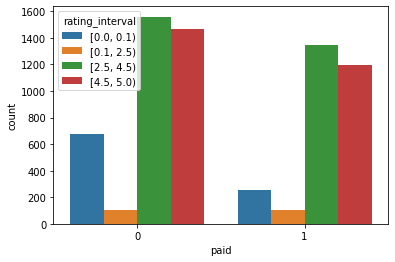

In [134]:
sns.countplot(x = 'paid', hue = 'rating_interval', data = appL49)

## 4.4 APP大小，价格及用户评分有无关系

In [131]:
appSiPrUR = ['size_bytes', 'price', 'user_rating']
appL49[appSiPrUR].corr()

,size_bytes,price,user_rating
size_bytes,1.000000,0.321719,0.066134
price,0.321719,1.000000,0.073716
user_rating,0.066134,0.073716,1.000000


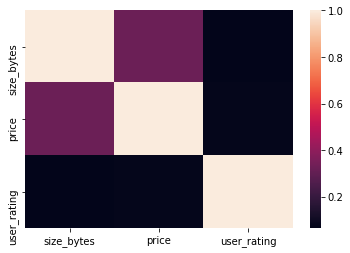

In [133]:
#热力图展现变量之间两两关系的强弱
sns.heatmap(appL49[appSiPrUR].corr())